In [1]:
import sys
sys.path.append('/Users/billystrickland/Documents/code/resonators')
import csv
import matplotlib.pyplot as plt
from shabanipy.labber import LabberData
from shabanipy.resonators.notch_geometry import fit_complex, notch_from_results
import numpy as np
import os
from matplotlib.pyplot import cm
from matplotlib import colors
from scipy.signal import find_peaks, peak_prominences
import math


from shabanipy.jy_mpl_settings.settings import jy_mpl_rc
from shabanipy.jy_mpl_settings.helper import *
from shabanipy.jy_mpl_settings.colors import line_colors

from scipy.optimize import curve_fit
from typing import Optional

from hmmlearn import hmm

import utils.resonator_functions as rf

plt.style.use(jy_mpl_rc)

def convert_mag(current):
    return np.array(current)/385e3

In [2]:
# Define the root directory where data files are stored
root = '/Users/billystrickland/Documents/code/resonators/data/'

# Specify the sample name for which the data will be processed
sample = 'JS626-4SQ-v2-7-BSBHE-CD1'

# Define the file path for saving results of the current sample
file = '/Users/billystrickland/Documents/code/resonators/data/' + sample + '/results/'

# Define an error threshold value (presumably used to filter out data points that exceed this value)
err_thresh = 5000

# List of different marker styles for plotting (used for distinguishing different data series)
markers = ['o', 'v', 's', '*', '^', 'd', '<']

# Define a function 'func_tls' that models the behavior of a TLS (Two-Level System) resonance with 
# parameters Q0 (quality factor), T (temperature), nc (characteristic number of TLSs), 
# n (filling factor or similar parameter), and f (frequency).
def func_tls(Q0, T, nc, n, f):
    # Define physical constants: 
    # kb = Boltzmann constant in eV/K
    kb = 8.617e-5  
    # h = Planck constant in eV·s
    h = 4.136e-15
    
    # Calculate and return the TLS function using the input parameters.
    # The function models the quality factor behavior with temperature, filling factor, and frequency.
    return Q0 * np.sqrt(1 + (n / nc)) / np.tanh(h * f / (kb * T))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


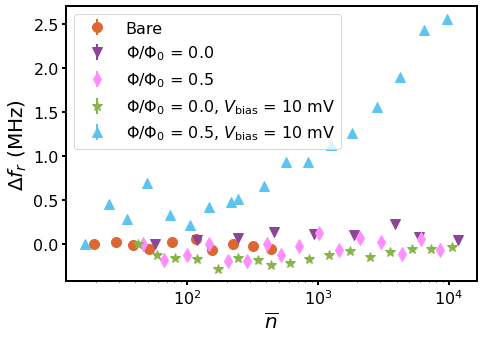

In [14]:
# Define a list of labels for different experimental conditions or traces
traces = [
     r'Bare',                                     # Label for the bare resonator condition
     '$\Phi/\Phi_0$ = 0.0',                       # Label for condition with zero flux
     r'$\Phi/\Phi_0$ = 0.5',                      # Label for condition with half flux
     r'$\Phi/\Phi_0$ = 0.0, $V_\mathrm{bias}$ = 10 mV',  # Label for zero flux and 10 mV bias
    r'$\Phi/\Phi_0$ = 0.5, $V_\mathrm{bias}$ = 10 mV',   # Label for half flux and 10 mV bias
    ]

# Define a list of IDs corresponding to each trace
ID = [
    '1132',                             # ID for Bare resonator condition
    '1137',                              # ID for SQ 0 flux 0 mV condition
    '827',                               # ID for SQ half flux 0 mV condition
    '825',                               # ID for SQ 0 flux 10 mV condition
    '786',                               # ID for SQ half flux 10 mV condition
    ]

# Define the file path where the data files are located
file = '/Users/billystrickland/Documents/code/resonators/data/'+sample+'/results/'

# Create an empty list to store file paths for each trace
FILES = []

# Loop through each ID and construct the full file path for each
for i in range(len(ID)):
    FILES.append([file+ID[i]+'.csv'])  # Append the file path to the FILES list

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize = (7,5))

# Set the x-axis and y-axis labels for the plot
plt.xlabel(r'$\overline{n}$')         # Label for the x-axis (average photon number)
plt.ylabel('$\Delta f_r$ (MHz)')     # Label for the y-axis (frequency shift in MHz)

# Loop through the list of files to process each one
for i, file in enumerate(FILES):
    # Process the data from the CSV file using rf.proc_csv function
    results = rf.proc_csv(file)
    
    # Extract relevant results (photon number, power, and frequency values) using rf.get_results
    photon, power, qi_diacorr, qi_diacorr_err, _, _, _, _, freq, freq_err = rf.get_results(results, err_thresh)
    
    # Sort the photon and frequency data based on photon number
    photon, freq, freq_err = zip(*sorted(zip(photon, freq, freq_err)))
    
    # Downsample the data (take every third data point)
    photon, freq, freq_err = photon[::3], freq[::3], freq_err[::3]
    
    # Plot the frequency vs. photon number with error bars
    ax.errorbar(np.array(photon[:-4]), (np.array(freq[:-4]) - freq[0]) * 1e-6,  # Frequency shift in MHz
                yerr=np.array(freq_err[:-4]) * 1e-9,                            # Frequency error in Hz
                color=line_colors[8 if i == 2 else i + 1],                        # Set the color of the line
                linestyle='None',                                                  # No connecting line
                marker=('d' if i == 2 else markers[i]),                           # Set marker style based on the trace
                label=traces[i])                                                  # Label for the trace in the legend

# Display the legend for the plot
plt.legend()

# Set the x-axis scale to logarithmic
plt.xscale('log')

# Adjust the layout of the plot to prevent overlap
fig.tight_layout()

# Save the figure as an EPS file
plt.savefig('frequency_power.eps', format = 'eps')


['1135', '1158', '246_tone=1', '246_tone=0']
['1135', '1158', '246_tone=1', '246_tone=0']
['1135', '1158', '246_tone=1', '246_tone=0']
['1135', '1158', '246_tone=1', '246_tone=0']
slope, intercept = (-0.0462333881873354, 8.878558570518019)
slope, intercept = (-0.1332393902612109, 9.380977350844203)
slope, intercept = (-0.11951177964956848, 7.638107946754696)
slope, intercept = (-0.04985926017112877, 7.669486999695931)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


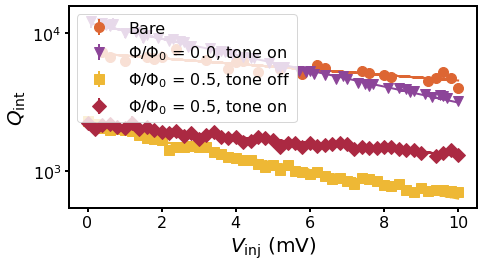

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


slope, intercept = (-4.2581875415028375e-06, 8304105866.973143)
slope, intercept = (-1.4934426486963387e-05, 5891879217.444468)
slope, intercept = (-0.0001125313410869595, 5840518068.176768)
slope, intercept = (-3.908912402898278e-05, 5839546789.154592)


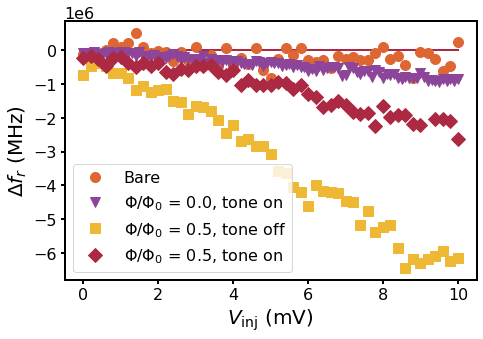

In [15]:
# Function for fitting an exponential model to data
def func_line(v, a, b, c):
    return b * np.exp(c * v)

# Function to plot internal quality factor (Qint) and frequency shift (Δf) vs power
def plot_deltaf_qint(FILES, x_label, savepath, traces, scale='linear', err_thresh=1000, figsize=(7, 4), yscale='linear', xticks=0):
    y_label = '$Q_\\mathrm{int}$'
    # Create figure and axis for Qint plot
    fig, ax = rf.make_plot_pre('', y_label, xscale=scale, figsize=figsize)
    ax.set_yscale(yscale)

    for i in range(len(FILES)):
        # Load and process measurement results from CSV
        results = rf.proc_csv(FILES[i])            
        photon, power, qi_diacorr, qi_diacorr_err, qc, qc_err, ql, ql_err, freq, freq_err = rf.get_results(results, err_thresh)

        # Sort data by photon number to ensure smooth plots
        photon, power, qi_diacorr, qi_diacorr_err, freq = zip(*sorted(zip(photon, power, qi_diacorr, qi_diacorr_err, freq)))

        # Adjust sampling step to thin points for first two traces
        step = 2 if i < 2 else 1

        # Fit log of Qint vs power for exponential behavior
        y = np.log(np.array(qi_diacorr[::step]))
        x = np.array(power[::step]) * 1e3  # Convert to mW
        slope, intercept = np.polyfit(x, y, 1)
        print(f'slope, intercept = {slope, intercept}')
        y_fit = slope * x + intercept

        # Set color and marker style
        color_idx = i + 1 if i < 3 else i + 3
        marker_style = markers[i] if i < 3 else 'D'

        # Plot Qint with error bars
        ax.errorbar(
            x,
            qi_diacorr[::step],
            yerr=qi_diacorr_err[::step],
            linestyle='None',
            color=line_colors[color_idx],
            marker=marker_style,
            label=traces[i]
        )
        # Plot fitted exponential curve
        ax.plot(x, np.exp(y_fit), color=line_colors[color_idx])

    plt.yscale('log')
    plt.legend()
    plt.xlabel(x_label)
    savename = savepath + '_' + y_label + '.eps'
    rf.make_plot_post(fig, savename)

    # Plot frequency shift (Δf)
    y_label = '$\\Delta f_r$ (MHz)'
    fig, ax = rf.make_plot_pre(x_label, y_label, xscale=scale, figsize=(7, 5))

    for i in range(len(FILES)):
        results = rf.proc_csv(FILES[i])            
        photon, power, qi_diacorr, qi_diacorr_err, qc, qc_err, ql, ql_err, freq, freq_err = rf.get_results(results, err_thresh)
        photon, power, qi_diacorr, qi_diacorr_err, freq = zip(*sorted(zip(photon, power, qi_diacorr, qi_diacorr_err, freq)))

        # Frequency data and power in mW
        y = np.array(freq)
        x = np.array(power) * 1e3

        # Fit linear trend to frequency shift
        slope, intercept = np.polyfit(x, y, 1)
        print(f'slope, intercept = {slope/intercept, intercept}')
        y_fit = slope * x / intercept  # Normalized slope?

        # Calculate delta-f for error bars
        step = 1
        y_data = (np.array(freq[::step]) - intercept)
        x_data = np.array(power[::step]) * 1e3

        color_idx = i + 1 if i < 3 else i + 3
        marker_style = markers[i] if i < 3 else 'D'

        # Plot frequency shift with markers
        ax.errorbar(
            x_data,
            y_data,
            color=line_colors[color_idx],
            linestyle='None',
            marker=marker_style,
            label=traces[i]
        )

        # Plot fitted line
        plt.plot(
            x,
            y_fit,
            color=line_colors[color_idx]
        )

    plt.legend()
    fig.tight_layout()
    plt.savefig('frequency_vinj.eps', format='eps')


# List of file identifiers for each measurement
ID = [
    '1135',                      # vbias bare, Jan. 24
    '1158',                      # vbias 0 flux, Jan. 26
    '246_tone=1',                # vbias half flux, tone off, Dec. 6
    '246_tone=0',                # vbias half flux, tone on, Dec. 6
]

# Construct file paths from IDs
FILES = []
file = '/Users/billystrickland/Documents/code/resonators/data/' + sample + '/results/'
for i in range(len(ID)):
    print(ID)
    FILES.append([file + ID[i] + '.csv'])

# Trace labels for legend
traces = [
    r'Bare',
    r'$\Phi/\Phi_0$ = 0.0, tone on', 
    r'$\Phi/\Phi_0$ = 0.5, tone off',
    r'$\Phi/\Phi_0$ = 0.5, tone on',
    r'$\Phi/\Phi_0$ = 0.0, tone on',
]

# Output filename
savename = 'vinj.eps'

# Generate the plots
plot_deltaf_qint(
    FILES,
    r'$V_\mathrm{inj}$ (mV)',
    savename,
    traces,
    err_thresh=1500,
    scale='linear',
    yscale='linear',
    figsize=(7, 4)
)


# Plot power dependence of Qint

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


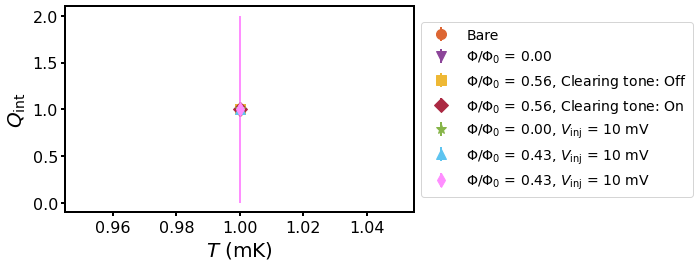

In [16]:
# Trace labels for legend entries
traces = [
    r'Bare',
    r'$\Phi/\Phi_0$ = 0.00',
    r'$\Phi/\Phi_0$ = 0.56, Clearing tone: Off',
    r'$\Phi/\Phi_0$ = 0.56, Clearing tone: On',
    r'$\Phi/\Phi_0$ = 0.00, $V_\mathrm{inj}$ = 10 mV',
    r'$\Phi/\Phi_0$ = 0.43, $V_\mathrm{inj}$ = 10 mV',
    r'$\Phi/\Phi_0$ = 0.43, $V_\mathrm{inj}$ = 10 mV',
]

# Function to generate a dummy plot used only for legend creation
def plot_deltaf_qint_fit(FILES, x_label, savepath, traces, mod=1, scale='linear', err_thresh=1000, figsize=(6, 4), yscale='linear', xticks=0):
    y_label = '$Q_\\mathrm{int}$'
    
    # Create a figure with desired scales and labels
    fig, ax = rf.make_plot_pre(x_label, y_label, xscale=scale, figsize=figsize)

    for i in range(7):
        # Plot invisible dummy points for legend formatting
        if i < 3:
            ax.errorbar(
                1, 1, yerr=1,
                linestyle='None',
                color=line_colors[i + 1],
                marker=markers[i],
                label=traces[i]
            )
        elif i == 3:
            ax.errorbar(
                1, 1, yerr=1,
                linestyle='None',
                color=line_colors[i + 3],
                marker='D',
                label=traces[i]
            )
        elif i == 4:
            ax.errorbar(
                1, 1, yerr=1,
                linestyle='None',
                color=line_colors[4],
                marker='*',
                label=traces[i]
            )
        elif i == 5:
            ax.errorbar(
                1, 1, yerr=1,
                linestyle='None',
                color=line_colors[5],
                marker='^',
                label=traces[i]
            )
        elif i == 6:
            ax.errorbar(
                1, 1, yerr=1,
                linestyle='None',
                color=line_colors[8],
                marker='d',
                label=traces[i]
            )

    # Save the legend separately with custom layout
    savename = savepath + '_' + y_label + '.eps'
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    rf.make_plot_post(fig, savename)

# Measurement file identifiers
ID = [
    '1131_tone=0_magnet=0_center=0',    # bare resonator, Jan 23
    '1131_tone=0_magnet=5_center=1',    # SQUID 0 flux, Jan 23
    '1131_tone=0_magnet=10_center=1',   # SQUID half flux, tone off, Jan 23
    '1131_tone=1_magnet=10_center=1',   # SQUID half flux, tone on, Jan 23
    '1131_tone=1_magnet=10_center=1',   # repeat: tone on, Jan 23
    '1131_tone=1_magnet=10_center=1',   # repeat
    '1131_tone=1_magnet=10_center=1',   # repeat
]

# Build file paths from IDs
FILES = []
for i in range(len(ID)):
    FILES.append([file + ID[i] + '.csv'])

# Set save location for legend plot
savepath = root + sample + '/results/' + ID[0] + 'leg'

# Generate the legend-only plot
plot_deltaf_qint_fit(
    FILES,
    r'$T$ (mK)',
    savepath,
    traces,
    mod=1e3,
    err_thresh=err_thresh,
    scale='linear',
    yscale='log',
    xticks=1,
    figsize=(10, 4)
)


In [17]:
import numpy as np
from scipy.special import kn, iv

# Constants
kb = 8.617e-5         # Boltzmann constant in eV/K
h = 4.136e-15         # Planck constant in eV·s

def sigma1(T, d, f):
    """
    Computes the real part of the complex conductivity (σ₁)
    based on Mattis-Bardeen theory in the dirty limit.

    Parameters:
    T : float or np.ndarray
        Temperature in Kelvin
    d : float
        Superconducting energy gap in eV
    f : float
        Frequency in Hz

    Returns:
    float or np.ndarray
        Real part of conductivity
    """
    x = h * f / (2 * kb * T)
    return (4 * d / (h * f) * np.exp(-d / (kb * T)) * np.sinh(x)) * kn(0, x)

def sigma2(T, d, f):
    """
    Computes the imaginary part of the complex conductivity (σ₂)
    using approximations valid at low temperatures.

    Parameters:
    T : float or np.ndarray
        Temperature in Kelvin
    d : float
        Superconducting energy gap in eV
    f : float
        Frequency in Hz

    Returns:
    float or np.ndarray
        Imaginary part of conductivity
    """
    x = h * f / (2 * kb * T)
    prefactor = np.pi * d / (h * f)
    correction = np.sqrt(2 * np.pi * kb * T / d) * np.exp(-d / (kb * T))
    exponential = 2 * np.exp(-d / (kb * T)) * np.exp(-x) * iv(0, x)
    return prefactor * (1 - correction - exponential)

def phi(T, d, f):
    """
    Calculates the complex phase of the complex conductivity.

    Parameters:
    T : float or np.ndarray
        Temperature in Kelvin
    d : float
        Superconducting energy gap in eV
    f : float
        Frequency in Hz

    Returns:
    float or np.ndarray
        Phase angle (in radians) of the complex conductivity
    """
    return np.arctan(sigma2(T, d, f) / sigma1(T, d, f))

def func_deltafoverf(T, a, d, f):
    """
    Computes the fractional frequency shift Δf/f as a function of temperature,
    based on kinetic inductance contribution from Mattis-Bardeen theory.

    Parameters:
    T : float or np.ndarray
        Temperature in Kelvin
    a : float
        Kinetic inductance fraction (dimensionless)
    d : float
        Superconducting energy gap in eV
    f : float
        Frequency in Hz

    Returns:
    float or np.ndarray
        Fractional frequency shift Δf/f
    """
    # Complex conductivity magnitude ratio relative to base temperature (1 mK)
    sigma_mag_ratio = np.sqrt(
        (sigma1(T, d, f)**2 + sigma2(T, d, f)**2) /
        (sigma1(0.001, d, f)**2 + sigma2(0.001, d, f)**2)
    )
    
    return -a / 2 * (1 - np.sin(phi(T, d, f)) * sigma_mag_ratio)


[1.10000893e-01 2.10000001e-04 8.30451354e+09]
3481.2449698086834


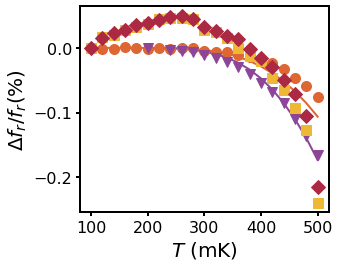

In [18]:
ID = [
    '1131_tone=0_magnet=0_center=0',     # Temp dep: bare resonator, Jan 23
    '1131_tone=0_magnet=5_center=1',     # Temp dep: SQUID 0 flux, Jan 23
    '1131_tone=0_magnet=10_center=1',    # Temp dep: SQUID half flux, tone off, Jan 23
    '1131_tone=1_magnet=10_center=1',    # Temp dep: SQUID half flux, tone on, Jan 23
]

FILES = []
for i in range(len(ID)):
    FILES.append([file + ID[i] + '.csv'])

traces = [
    r'Bare',
    r'$\Phi/\Phi_0$ = 0.0', 
    r'$\Phi/\Phi_0$ = 0.5, tone on',     
    r'$\Phi/\Phi_0$ = 0.5, tone off',
]

savepath = root + sample + '/results/' + ID[0]

def plot_deltaf_qint_fit(FILES, x_label, savepath, traces, mod=1, scale='linear', err_thresh=1000, figsize=(6, 4), yscale='linear', xticks=0):
    y_label = r'$\Delta f_r/f_r (\%)$'
    fig, ax = rf.make_plot_pre(x_label, y_label, xscale=scale, figsize=(5, 4))

    for i in range(len(FILES)):
        # Load and process data
        results = rf.proc_csv(FILES[i])            
        photon, power, qi_diacorr, qi_diacorr_err, qc, qc_err, ql, ql_err, freq, freq_err = rf.get_results(results, err_thresh) 

        # Plot Δf/f (%) with markers based on trace type
        freq_shift = (np.array(freq) - freq[0]) / freq * 100
        power_scaled = np.array(power) * mod

        if i < 2:
            ax.errorbar(power_scaled, freq_shift, linestyle='None',
                        color=line_colors[i + 1], marker=markers[i], label=traces[i])
        elif i == 2:
            ax.errorbar(power_scaled, freq_shift, linestyle='None',
                        color=line_colors[i + 1], marker=markers[i], label=traces[i])
        elif i == 3:
            ax.errorbar(power_scaled, freq_shift, linestyle='None',
                        color=line_colors[i + 3], marker='D', label=traces[i])

        # Fit and plot theoretical model for i=0
        if i == 0:
            # Define parameter bounds for curve fitting
            alim = [0.11, 1]
            blim = [209.9999e-6, 210.000001e-6]
            clim = [freq[0], freq[0] + 1]

            # Fit Δf/f model using func_deltafoverf
            popt, pcov = curve_fit(func_deltafoverf, np.array(power), qi_diacorr,
                                   bounds=([alim[0], blim[0], clim[0]],
                                           [alim[1], blim[1], clim[1]]),
                                   maxfev=500000000)
            a = popt
            print(a)

            # Plot best-fit model
            y_fit = func_deltafoverf(np.array(power), a[0], a[1], a[2])
            plt.plot(power_scaled, y_fit * 100, color=line_colors[1])
            print(qi_diacorr[0])

        # Plot predefined theoretical model for i=1
        if i == 1:
            plt.plot(power_scaled, func_deltafoverf(np.array(power), 0.17, 210e-6, freq[0]) * 100,
                     color=line_colors[i + 1])

    plt.xticks([100, 200, 300, 400, 500])
    plt.tight_layout()
    plt.savefig('frequency_temperature.eps', format='eps')

# Run plotting function
plot_deltaf_qint_fit(
    FILES,
    r'$T$ (mK)',
    savepath,
    traces,
    mod=1e3,
    err_thresh=err_thresh,
    scale='linear',
    yscale='log',
    xticks=1,
    figsize=(7.5, 4)
)


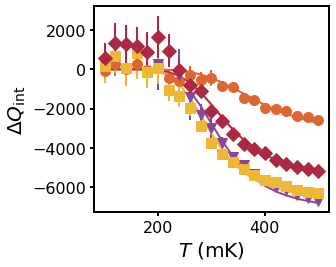

In [19]:
from scipy.special import kn
from scipy.optimize import curve_fit
import numpy as np

# Quasiparticle loss model based on Mattis-Bardeen
def func_qint_qp(T, delta, Qi, Q0, f):
    kb = 8.617e-5   # eV/K
    h = 4.136e-15   # eV·s
    Qqp = Q0 * np.exp(delta / (kb * T)) / (np.sinh(h * f / (2 * kb * T)) * kn(0, h * f / (2 * kb * T)))
    Qint = 1 / (1 / Qi + 1 / Qqp)
    return Qint

# Main plotting and fitting routine
def plot_deltaf_qint_fit(FILES, x_label, savepath, traces, mod=1, scale='linear', err_thresh=1000, figsize=(6, 4), yscale='linear', xticks=0):
    y_label = r'$\Delta Q_\mathrm{int}$'
    x_label = r'$T$ (mK)'
    fig, ax = rf.make_plot_pre('', y_label, xscale=scale, figsize=figsize)

    for i in range(len(FILES)):
        results = rf.proc_csv(FILES[i])
        photon, power, qi_diacorr, qi_diacorr_err, qc, qc_err, ql, ql_err, freq, freq_err = rf.get_results(results, err_thresh)

        # Sort by temperature (or power)
        power, qi_diacorr, qi_diacorr_err, freq = zip(*sorted(zip(power, qi_diacorr, qi_diacorr_err, freq)))

        # Fit parameter bounds
        alim = [209.99999999999e-6, 210e-6]     # Δ: superconducting gap (tight bounds)
        blim = [1000, 10000]                    # Q_i: intrinsic baseline
        clim = [1, 10]                          # Q_0: scaling prefactor
        dlim = [freq[0] - 0.1, freq[0] + 0.1]   # f: frequency, narrow range

        if scale == 'linear':
            if i < 3 or i == 3:
                sigma = qi_diacorr_err if i == 3 else None
                popt, pcov = curve_fit(func_qint_qp, np.array(power), qi_diacorr,
                                       sigma=sigma,
                                       bounds=([alim[0], blim[0], clim[0], dlim[0]],
                                               [alim[1], blim[1], clim[1], dlim[1]]),
                                       maxfev=500000000)
                delta, Qi, Q0, f_fit = popt
                y_fit = func_qint_qp(np.array(power), delta, Qi, Q0, f_fit)
                residual = y_fit - Qi

                # Choose color and marker style
                color = line_colors[i+1] if i < 3 else line_colors[i+3]
                marker = markers[i] if i < 3 else 'D'

                # Plot fit and data
                plt.plot(np.array(power) * 1e3, residual, color=color)
                ax.errorbar(np.array(power) * mod, np.array(qi_diacorr) - Qi, yerr=qi_diacorr_err,
                            linestyle='None', color=color, marker=marker,
                            label=traces[i] + r', $Q_{\mathrm{QP},0}$ = ' + str(round(Q0, 2)))

    plt.xlabel(x_label)
    plt.tight_layout()
    plt.savefig('qint_temperature.eps', format='eps')

# ==== DATA SETUP ====

ID = [
    '1131_tone=0_magnet=0_center=0',     # Bare resonator
    '1131_tone=0_magnet=5_center=1',     # SQUID @ Φ/Φ₀ = 0
    '1131_tone=0_magnet=10_center=1',    # SQUID @ Φ/Φ₀ = 0.5, tone off
    '1131_tone=1_magnet=10_center=1',    # SQUID @ Φ/Φ₀ = 0.5, tone on
]

FILES = [[file + id_ + '.csv'] for id_ in ID]

traces = [
    r'Bare',
    r'$\Phi/\Phi_0$ = 0.0', 
    r'$\Phi/\Phi_0$ = 0.5, tone off',
    r'$\Phi/\Phi_0$ = 0.5, tone on',
]

savepath = root + sample + '/results/' + ID[0]

# ==== PLOTTING ====

plot_deltaf_qint_fit(
    FILES,
    r'$T$ (mK)',
    savepath,
    traces,
    mod=1e3,
    err_thresh=err_thresh,
    scale='linear',
    yscale='log',
    xticks=1,
    figsize=(5, 4)
)


Q0 = 6994.877, beta = 1.8080595499536492e-05, gamma = 1.0
Q0 = 11649.932, beta = 9.49431715505346e-06, gamma = 0.0
Q0 = 4931.473, beta = 9.029138369889608e-05, gamma = 0.001
Q0 = 2400.0, beta = 0.00018586623510820574, gamma = 0.002
Q0 = 1100.0, beta = 0.0007470726677192054, gamma = 0.001


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


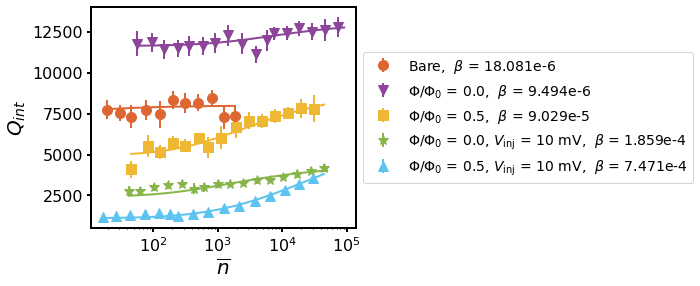

In [21]:
# Marker styles for each trace in the plot
markers = ['o', 'v', 's', '*', '^', 'd', '<']

# TLS model function for internal quality factor
def func_tls(n, Q0, beta, gamma):
    """
    TLS model: Internal quality factor Qint as a function of average photon number n.
    Q0    : intrinsic quality factor (baseline)
    beta  : TLS participation ratio
    gamma : saturation parameter (TLS-related)

    Returns Qint as predicted by TLS theory.
    """
    kb = 8.617e-5  # Boltzmann constant in eV/K
    h = 4.136e-15  # Planck constant in eV·s
    return 1 / ((1 / Q0) + beta * (1 / (1 + (gamma * n / (1 + 0.5 * (np.sqrt(1 + 4 * gamma * n) - 1)))) - 1))

# Main plotting function: fits TLS model to Qint vs photon number and plots each dataset
def plot_deltaf_qint_pow(FILES, x_label, savepath, traces, mod=1, scale='linear', err_thresh=1000, figsize=(6, 4), yscale='linear'):
    y_label = '$Q_{int}$'
    
    # Initialize plot
    fig, ax = rf.make_plot_pre('', y_label, xscale=scale, figsize=figsize)

    for i in range(len(FILES)):
        # Load and process data
        results = rf.proc_csv(FILES[i])
        photon, power, qi_diacorr, qi_diacorr_err, qc, qc_err, ql, ql_err, freq, freq_err = rf.get_results(results, err_thresh)
        
        # Sort data by photon number
        photon, power, qi_diacorr, qi_diacorr_err, freq = zip(*sorted(zip(photon, power, qi_diacorr, qi_diacorr_err, freq)))
        
        # Trace-specific bounds for curve fitting
        if i == 4:
            alim = [1e3, 1.1e3]
            blim = [6.3e-6, 1e-3]
            clim = [0.001, 0.002]
        elif i == 3:
            alim = [2.2e3, 2.4e3]
            blim = [6.3e-6, 1e-3]
            clim = [0.0001, 0.002]
        else:
            alim = [qi_diacorr[0] - 1000, qi_diacorr[0] + 1000]
            blim = [1e-7, 0.1e-3]
            clim = [0, 1]

        # Trim problematic data points for trace 1
        if i == 1:
            photon = photon[0:-4]
            qi_diacorr = qi_diacorr[0:-4]
            qi_diacorr_err = qi_diacorr_err[0:-4]

        # Fit TLS model to data
        popt, pcov = curve_fit(
            func_tls, np.array(photon), qi_diacorr,
            bounds=([alim[0], blim[0], clim[0]], [alim[1], blim[1], clim[1]]),
            maxfev=5_000_000_000
        )
        a = popt
        print(f'Q0 = {round(a[0],3)}, beta = {a[1]}, gamma = {round(a[2],3)}')

        # Generate fitted curve
        y_fit = func_tls(np.array(photon), *a)

        # Plot fitted curve
        plt.plot(np.array(photon), y_fit, color=line_colors[i+1])

        # Resample for clearer error bars
        step = 4 if i != 1 else 2  # Finer step for trace 1
        scale_factor = [1e6, 1e6, 1e5, 1e4, 1e4][i]
        unit = ['e-6', 'e-6', 'e-5', 'e-4', 'e-4'][i]
        beta_label = round(a[1] * scale_factor, 3)

        # Plot experimental data with error bars
        ax.errorbar(
            np.array(photon[::step]) * mod, qi_diacorr[::step],
            yerr=qi_diacorr_err[::step],
            linestyle='None', color=line_colors[i+1], marker=markers[i],
            label=traces[i] + r' $\beta$ = ' + f'{beta_label}' + f'{unit}'
        )

    # Final plot formatting and saving
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    plt.xlabel('$\\overline{n}$')
    savename = savepath + '.eps'
    plt.savefig(savename, transparent=True, bbox_inches='tight')

# -----------------------
# Execution / Configuration
# -----------------------

# Trace identifiers corresponding to data files
ID = [
    '1132',  # Bare device, Jan 24
    '1137',  # Flux 0.0, Jan 24
    '827',   # Flux 0.5, Jan 4
    '825',   # Flux 0.0 with injection, Jan 4
    '786'    # Flux 0.5 with injection, Jan 2
]

# Labels for the legend
traces = [
    r'Bare, ',
    r'$\Phi/\Phi_0$ = 0.0, ',
    r'$\Phi/\Phi_0$ = 0.5, ',
    r'$\Phi/\Phi_0$ = 0.0, $V_\mathrm{inj}$ = 10 mV, ',
    r'$\Phi/\Phi_0$ = 0.5, $V_\mathrm{inj}$ = 10 mV, '
]

# File paths to data
file = '/Users/billystrickland/Documents/code/resonators/data/' + sample + '/results/'
FILES = [[file + ID[i] + '.csv'] for i in range(len(ID))]

# Output save path
savepath = root + sample + '/results/power_fit'

# Call the main plotting function
plot_deltaf_qint_pow(FILES, r'$\overline{n}$', savepath, traces, mod=1, err_thresh=err_thresh, scale='log', yscale='log', figsize=(5, 4))


Q0 =  6751.269  beta =  2.220159779000028e-05 gamma =  0.49
Q0 =  11657.631  beta =  9.916725888279208e-06 gamma =  0.0
Q0 =  4931.473  beta =  9.029138369889608e-05 gamma =  0.001
Q0 =  2400.0  beta =  0.00018586623510820574 gamma =  0.002
Q0 =  1100.0  beta =  0.7470726677192054 gamma =  0.001


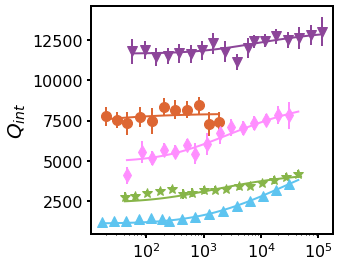

In [24]:
# List of marker styles for plotting
markers = ['o', 'v', 's', '*', '^', 'd', '<']

# Function that models a theoretical TLS (two-level system) behavior based on input parameters
def func_tls(n, Q0, beta, gamma):
    kb = 8.617e-5  # Boltzmann constant (in eV/K)
    h = 4.136e-15  # Planck's constant (in eV*s)
    # Formula for the TLS model, computing the inverse of the total rate
    return 1 / ((1 / Q0) + beta * (1 / (1 + (gamma * n / (1 + (1 / 2) * (np.sqrt(1 + 4 * gamma * n) - 1)))) - 1))

# Function to plot the data, fits, and other results from the given files
def plot_deltaf_qint_pow(FILES, x_label, savepath, traces, mod=1, scale='linear', err_thresh=1000, figsize=(6, 4), yscale='linear'):
    y_label = '$Q_{int}$'  # Label for the y-axis
    # Create a plot with a given size and scale
    fig, ax = rf.make_plot_pre('', y_label, xscale=scale, figsize=(figsize))

    # Loop over all files and plot the results for each one
    for i in range(len(FILES)):
        # Process the file and extract the relevant data
        results = rf.proc_csv(FILES[i])
        photon, power, qi_diacorr, qi_diacorr_err, qc, qc_err, ql, ql_err, freq, freq_err = rf.get_results(results, err_thresh)

        # Sort the data based on photon values for consistent plotting
        photon, power, qi_diacorr, qi_diacorr_err, freq = zip(*sorted(zip(photon, power, qi_diacorr, qi_diacorr_err, freq)))

        # Apply different fitting logic for different cases (based on 'i')
        if i == 4:
            # Specific limits for this case
            alim = [1e3, 1.1e3]
            blim = [6.3e-6, 1e-3]
            clim = [0.001, 0.002]
            # Fit the TLS model to the data
            popt, pcov = curve_fit(func_tls, np.array(photon), qi_diacorr, bounds=([alim[0], blim[0], clim[0]], [alim[1], blim[1], clim[1]]), maxfev=500000000)
            a = popt
            print('Q0 = ', round(a[0], 3), ' beta = ', a[1] * 1e3, 'gamma = ', round(a[2], 3))
            # Plot the fitted curve
            y_fit = func_tls(np.array(photon), a[0], a[1], a[2])
            plt.plot(np.array(photon), y_fit, color=line_colors[i + 1],)
            # Plot the error bars with markers and labels
            ax.errorbar(np.array(photon[::4]) * mod, qi_diacorr[::4], yerr=qi_diacorr_err[::4], linestyle='None', color=line_colors[i + 1], marker=markers[i], label=traces[i] + r' $\beta$ = ' + str(round(a[1] * 1e4, 3)) + 'e-4')

        elif i == 3:
            # Another case with different limits for fitting
            alim = [2.2e3, 2.4e3]
            blim = [6.3e-6, 1e-3]
            clim = [0.0001, 0.002]
            popt, pcov = curve_fit(func_tls, np.array(photon), qi_diacorr, bounds=([alim[0], blim[0], clim[0]], [alim[1], blim[1], clim[1]]), maxfev=500000000)
            a = popt
            print('Q0 = ', round(a[0], 3), ' beta = ', a[1], 'gamma = ', round(a[2], 3))
            y_fit = func_tls(np.array(photon), a[0], a[1], a[2])
            plt.plot(np.array(photon), y_fit, color=line_colors[i + 1],)
            ax.errorbar(np.array(photon[::4]) * mod, qi_diacorr[::4], yerr=qi_diacorr_err[::4], linestyle='None', color=line_colors[i + 1], marker=markers[i], label=traces[i] + r' $\beta$ = ' + str(round(a[1] * 1e4, 3)) + 'e-4')

        elif i == 2:
            # Another case with different limits for fitting
            alim = [qi_diacorr[0] - 1000, qi_diacorr[0] + 1000]
            blim = [1e-7, .1e-3]
            clim = [0, 1]
            popt, pcov = curve_fit(func_tls, np.array(photon), qi_diacorr, bounds=([alim[0], blim[0], clim[0]], [alim[1], blim[1], clim[1]]), maxfev=500000000000)
            a = popt
            print('Q0 = ', round(a[0], 3), ' beta = ', a[1], 'gamma = ', round(a[2], 3))
            y_fit = func_tls(np.array(photon), a[0], a[1], a[2])
            plt.plot(np.array(photon), y_fit, color=line_colors[8],)
            ax.errorbar(np.array(photon[::4]) * mod, qi_diacorr[::4], yerr=qi_diacorr_err[::4], linestyle='None', color=line_colors[8], marker='d', label=traces[i] + r' $\beta$ = ' + str(round(a[1] * 1e5, 3)) + 'e-5')

        elif i == 1:
            # Yet another case with adjusted photon data and different fitting parameters
            alim = [qi_diacorr[0] - 1000, qi_diacorr[0] + 1000]
            blim = [1e-7, .1e-3]
            clim = [0, 1]
            photon, qi_diacorr, qi_diacorr_err = photon[0:-3], qi_diacorr[0:-3], qi_diacorr_err[0:-3]
            popt, pcov = curve_fit(func_tls, np.array(photon), qi_diacorr, bounds=([alim[0], blim[0], clim[0]], [alim[1], blim[1], clim[1]]), maxfev=500000000000)
            a = popt
            print('Q0 = ', round(a[0], 3), ' beta = ', a[1], 'gamma = ', round(a[2], 3))
            y_fit = func_tls(np.array(photon), a[0], a[1], a[2])
            plt.plot(np.array(photon), y_fit, color=line_colors[i + 1],)
            ax.errorbar(np.array(photon[::2]) * mod, qi_diacorr[::2], yerr=qi_diacorr_err[::2], linestyle='None', color=line_colors[i + 1], marker=markers[i], label=traces[i] + r' $\beta$ = ' + str(round(a[1] * 1e6, 3)) + 'e-6')

        elif i == 0:
            # Case with minimal adjustment, fitting based on photon data at specific intervals
            alim = [qi_diacorr[0] - 1000, qi_diacorr[0] + 1000]
            blim = [1e-7, .1e-3]
            clim = [0, 1]
            photon, qi_diacorr, qi_diacorr_err = photon[::4], qi_diacorr[::4], qi_diacorr_err[::4]
            popt, pcov = curve_fit(func_tls, np.array(photon), qi_diacorr, bounds=([alim[0], blim[0], clim[0]], [alim[1], blim[1], clim[1]]), maxfev=500000000000)
            a = popt
            print('Q0 = ', round(a[0], 3), ' beta = ', a[1], 'gamma = ', round(a[2], 3))
            y_fit = func_tls(np.array(photon), a[0], a[1], a[2])
            plt.plot(np.array(photon), y_fit, color=line_colors[i + 1],)
            ax.errorbar(np.array(photon) * mod, qi_diacorr, yerr=qi_diacorr_err, linestyle='None', color=line_colors[i + 1], marker=markers[i], label=traces[i] + r' $\beta$ = ' + str(round(a[1] * 1e6, 3)) + 'e-6')

    # Save the plot as an EPS file
    savename = savepath + '_' + y_label + '.eps'
    rf.make_plot_post(fig, savename)

# List of sample identifiers
ID = [
    '1132',  # Bare resonator, jan 24 UPDATED!!!!
    '1137',  # SQ 0 flux 0 mv, jan 24
    '827',   # SQ half flux 0 mv, Jan 4 UPDATED!!!!
    '825',   # SQ 0 flux 10 mv, Jan 4
    '786',   # SQ half 10 mv, Jan 2
]

# Corresponding labels for each sample
traces = [
    r'Bare',
    '$\Phi/\Phi_0$ = 0.0',
    r'$\Phi/\Phi_0$ = 0.5',
    r'$\Phi/\Phi_0$ = 0.0, $V_\mathrm{bias}$ = 10 mV',
    r'$\Phi/\Phi_0$ = 0.5, $V_\mathrm{bias}$ = 10 mV',
]

# Define the base file path for the data
file = '/Users/billystrickland/Documents/code/resonators/data/' + sample + '/results/'
FILES = []

# Construct the list of file paths based on sample IDs
for i in range(len(ID)):
    FILES.append([file + ID[i] + '.csv'])

# Define the save path for the results
savepath = root + sample + '/results/' + ID[0]

# Call the function to plot the data with the specified parameters
plot_deltaf_qint_pow(FILES,
                     r'$\overline{n}$',  # X-axis label
                     savepath,
                     traces,
                     mod=1,
                     err_thresh=err_thresh,
                     scale='log',
                     yscale='log',
                     figsize=(5, 4))


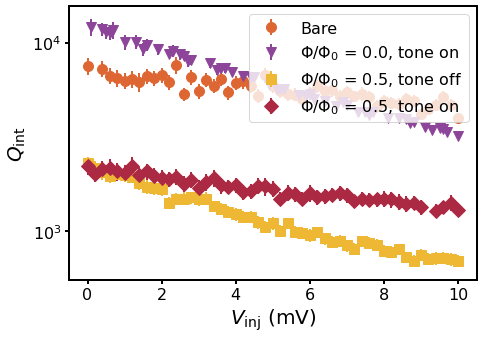

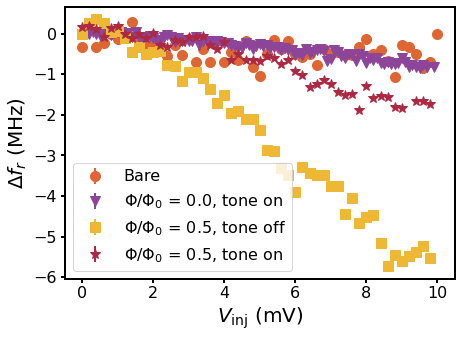

In [25]:
# List of experiment IDs, each representing a different condition for the data files
ID = [
    '1135',                     # vbias bare
    '1158',                # vbias 0 flux
    '246_tone=1',               # vbias half flux, tone off
    '246_tone=0',               # vbias half flux, tone on
    '814_tone=0',            # vbias 0 flux
]

# Initialize the list to hold the file paths
FILES = []
for i in range(len(ID)):
    # Append the file paths based on the experiment IDs
    FILES.append([file+ID[i]+'.csv'])

# List of trace labels corresponding to each dataset in the 'ID' list
traces = [
    r'Bare',
    '$\Phi/\Phi_0$ = 0.0, tone on', 
    r'$\Phi/\Phi_0$ = 0.5, tone off',
    r'$\Phi/\Phi_0$ = 0.5, tone on',     
    r'$\Phi/\Phi_0$ = 0.0, tone on',     
]

# Label for the x-axis
x_label = r'$V_\mathrm{inj}$ (mV)'

# Error threshold for data filtering
err_thresh=1500

# Create the first figure for plotting Q_int vs Power
fig, ax = plt.subplots(figsize =(7, 5))
ax.set_yscale('log')  # Set the y-axis scale to logarithmic
plt.xlabel(x_label)   # Set the x-axis label
plt.ylabel('$Q_\mathrm{int}$')  # Set the y-axis label

# Loop over each dataset in FILES to plot Q_int vs Power
for i in range(len(FILES)-1):
    # Process the CSV file and extract the data
    results = rf.proc_csv(FILES[i])            
    photon, power, qi_diacorr, qi_diacorr_err, qc, qc_err, ql, ql_err, freq, freq_err = rf.get_results(results, err_thresh) 
    # Sort the data based on photon values (this may improve the plot's visual consistency)
    photon, power, qi_diacorr, qi_diacorr_err, freq = zip(*sorted(zip(photon, power, qi_diacorr, qi_diacorr_err, freq)))
    
    # Plot different datasets with specific conditions for each trace
    if i == 0:
        ax.errorbar(np.array(power)*1e3,qi_diacorr,yerr=qi_diacorr_err,
            linestyle = 'None',color=line_colors[i+1],marker = markers[i], label = traces[i])  # Plot the first trace
    elif i == 1:
        ax.errorbar(np.array(power[::2])*1e3,qi_diacorr[::2],yerr=qi_diacorr_err[::2],
            linestyle = 'None',color=line_colors[i+1],marker = markers[i], label = traces[i])  # Plot the second trace (with subsampling)
    elif i == 2:
        ax.errorbar(np.array(power[::1])*1e3,qi_diacorr[::1],yerr=qi_diacorr_err[::1],
            linestyle = 'None',color=line_colors[i+1],marker = markers[i], label = traces[i])  # Plot the third trace
    elif i == 3:
        ax.errorbar(np.array(power[::1])*1e3,qi_diacorr[::1],yerr=qi_diacorr_err[::1],
            linestyle = 'None',color=line_colors[i+3],marker = 'D', label = traces[i])  # Plot the fourth trace with a different marker

# Add the legend to the plot
plt.legend()

# Adjust layout to ensure all elements fit within the figure
fig.tight_layout()

# Create the second figure for plotting Delta f_r vs Power
fig, ax = plt.subplots(figsize =(7, 5))
plt.xlabel(x_label)  # Set the x-axis label
plt.ylabel('$\Delta f_r$ (MHz)')  # Set the y-axis label

# Loop over each dataset in FILES to plot Delta f_r vs Power
for i in range(len(FILES)-1):
    # Process the CSV file and extract the data
    results = rf.proc_csv(FILES[i])            
    photon, power, qi_diacorr, qi_diacorr_err, qc, qc_err, ql, ql_err, freq, freq_err = rf.get_results(results, err_thresh) 
    # Sort the data based on photon values (for consistent plotting)
    photon, power, qi_diacorr, qi_diacorr_err, freq = zip(*sorted(zip(photon, power, qi_diacorr, qi_diacorr_err, freq)))
    
    # Define slices and color offsets for each dataset
    slices = [0, 2, 1, 1]
    color_offset = [1, 1, 1, 3]

    # Calculate frequency shift and plot the data
    ax.errorbar(np.array(power)[slices[i]::] * 1e3, 
                (np.array(freq)[slices[i]::] - np.array(freq[-slices[i]])) * 1e-6,  # Delta f_r calculation (in MHz)
                yerr=np.array(freq_err)[slices[i]::] * 1e-9,  # Frequency error (scaled)
                color=line_colors[i + color_offset[i]],  # Set color with an offset
                linestyle='None',  # No line connecting the points
                marker=markers[i],  # Use specific marker
                label=traces[i])  # Add a label to the plot for the legend

# Add the legend to the plot
plt.legend()


[1.10000893e-01 2.10000001e-04 8.30451354e+09]
3481.2449698086834


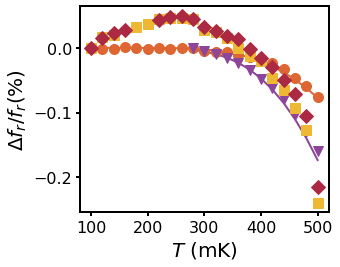

In [26]:
# Define the experiment IDs, each corresponding to different conditions or settings for the data files
ID = [
   '1131_tone=0_magnet=0_center=0',     # temp dep: bare res, Jan 23
   '1131_tone=0_magnet=5_center=1',     # temp dep: sq 0 flux, Jan 23
   '1131_tone=0_magnet=10_center=1',    # temp dep: sq half flux, tone on, Jan 23
   '1131_tone=1_magnet=10_center=1',    # temp dep: sq half flux, tone on, Jan 23
]

# Initialize the list to hold the file paths
FILES = []
for i in range(len(ID)):
    # Append the file paths based on the experiment IDs
    FILES.append([file + ID[i] + '.csv'])

# Labels for the different trace conditions
traces = [
     r'Bare',
    '$\Phi/\Phi_0$ = 0.0', 
    r'$\Phi/\Phi_0$ = 0.5, tone on',     
    r'$\Phi/\Phi_0$ = 0.5, tone off',
]

# Set the save path for the plot
savepath = root + sample + '/results/' + ID[0]

# Function to plot frequency shift vs power (delta f_r) for different experimental conditions
def plot_deltaf_qint_fit(FILES, x_label, savepath, traces, mod=1, scale='linear', err_thresh=1000, figsize=(6, 4), yscale='linear', xticks=0):
    # Set the y-axis label
    y_label = r'$\Delta f_r/f_r (\%)$'
    
    # Initialize the figure and axis for the plot
    fig, ax = rf.make_plot_pre(x_label, y_label, xscale=scale, figsize=(5, 4))
    
    # Loop through each file to process and plot the data
    for i in range(len(FILES)):
        # Process the CSV file to extract the necessary data
        results = rf.proc_csv(FILES[i])            
        photon, power, qi_diacorr, qi_diacorr_err, qc, qc_err, ql, ql_err, freq, freq_err = rf.get_results(results, err_thresh)

        # Depending on the experiment condition, plot the data with corresponding settings
        if i < 2:
            ax.errorbar(np.array(power) * mod, (np.array(freq) - (freq[0])) / (freq) * 100,
                    linestyle='None',  # No line connecting the points
                    color=line_colors[i + 1],  # Use specific color
                    marker=markers[i],  # Use specific marker
                    label=traces[i])  # Add label to the legend
        elif i == 2:
            ax.errorbar(np.array(power) * mod, (np.array(freq) - (freq[0])) / (freq) * 100,
                    linestyle='None', color=line_colors[i + 1], marker=markers[i], label=traces[i])
        elif i == 3:
            ax.errorbar(np.array(power) * mod, (np.array(freq) - (freq[0])) / (freq) * 100,
                    linestyle='None', color=line_colors[i + 3], marker='D', label=traces[i])

        # Fit a curve for the first data set (i == 0) to model the frequency shift behavior
        if i == 0:
            alim = [.11, 1]  # Set bounds for parameter 'a'
            blim = [209.9999e-6, 210.000001e-6]  # Set bounds for parameter 'b'
            clim = [freq[0], freq[0] + 1]  # Set bounds for parameter 'c'
            # Fit the data to the model function using curve fitting (optimized parameters)
            popt, pcov = curve_fit(func_deltafoverf, np.array(power), qi_diacorr,
                       bounds=([alim[0], blim[0], clim[0]], [alim[1], blim[1], clim[1]]),
                       maxfev=500000000
                        )
            a = popt  # Optimized parameters
            print(a)  # Print optimized parameters for debugging
            y_fit = func_deltafoverf(np.array(power), a[0], a[1], a[2])  # Calculate the fitted values
            # Plot the fitted curve on the graph
            plt.plot(np.array(power) * mod, (func_deltafoverf(np.array(power), .08, 210e-6, freq[0])) * 100, color=line_colors[1])
            print(qi_diacorr[0])  # Print the first value of qi_diacorr for debugging

        # Plot fitted curve for the second data set (i == 1)
        if i == 1:
            plt.plot(np.array(power) * mod, (func_deltafoverf(np.array(power), .17, 210e-6, freq[0])) * 100, color=line_colors[i + 1])

    # Set the file name for saving the plot
    savename = savepath + '_deltaff.eps'
    # Set custom x-axis ticks
    plt.xticks([100, 200, 300, 400, 500])
    # Finalize and save the plot
    rf.make_plot_post(fig, savename)

# Call the function to plot the data with specific parameters
plot_deltaf_qint_fit(FILES,
              r'$T$ (mK)',  # Temperature label for x-axis
               savepath,     # Path to save the figure
               traces,       # List of trace labels
               mod=1e3,      # Modify the x-axis scaling factor
               err_thresh=1000,  # Set error threshold for data processing
               scale='linear',   # Use linear scaling for x-axis
               yscale='log',     # Use logarithmic scaling for y-axis
               xticks=1,         # Enable custom x-tick marks
               figsize=(7.5, 4)) # Set figure size


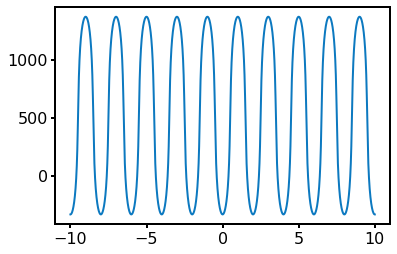

In [31]:
# Function to convert capacitance (C) to energy scale (Ec) in GHz
def C_to_Ec(x):
    print('EC = ', 19370/x/1000) # Prints Ec in GHz based on the given capacitance (x in fF)
    return 19370/x/1000 # Returns Ec in GHz, using the formula EC = 19370 / C

# Function to convert energy scale (Ec) in GHz to capacitance (C) in fF
def Ec_to_C(x):
    return 1000*x/19370 # Converts Ec (GHz) to capacitance (fF), using the formula C = 1000 * Ec / 19370

# Function to convert current (I) in microamperes to energy scale (Ej) in GHz
def I_to_Ej(x):
    return x * 496.7 # Converts current (I in µA) to energy scale Ej (in GHz), using the relation Ej = I * 496.7

# Function to convert energy scale (Ej) in GHz to current (I) in microamperes
def Ej_to_I(x):
    return x / 496.7 # Converts Ej (GHz) to current I (µA), using the relation I = Ej / 496.7

# Generate a linearly spaced array of values from -10 to 10 with 10001 points
x = np.linspace(-10, 10, 10001)

# Inductance values in nanohenries (nH)
Ll = 1 # Total inductance of the inductor in nanohenries
Lj = .1 # Inductance of the Josephson junction in nanohenries

# Total inductance (L) is the sum of Ll and Lj
L = Ll + Lj

# Calculate the energy for the inductance (El) using the formula El = 3.227 / L^2
El = 3.227 / (L)**2

# Calculate the energy for the Josephson junction (Ej) using the formula Ej = 3.227 / Lj^2
Ej = 3.227 / (Lj)**2

# Function to compute a general energy-related expression based on a parameter tau and input x
def E_general(tau, x):
    # The formula involves logarithmic operations and trigonometric functions
    return tau * np.log(np.sqrt(2) * tau * np.cos(x * np.pi) + np.sqrt(2 - tau**2 + tau**2 * np.cos(2 * x * np.pi))) / tau

# Plot the function -Ej * E_general(0.99, x) with respect to x
plt.plot(x, -Ej * E_general(0.99, x))
